# Spotify

Leer todos los csv de una carpeta y cargarlos en un único dataframe de pandas.

Este enfoque sirve cuando los CSV tienen la misma estructura de columnas pero solo cambia las fechas.

https://www.kaggle.com/datasets/cnic92/spotify-past-decades-songs-50s10s

In [1]:
import pandas as pd
import os

## Cargar datos

In [2]:
file_names = os.listdir('../../data/spotify/')
file_names

['1950.csv',
 '1960.csv',
 '1970.csv',
 '1980.csv',
 '1990.csv',
 '2000.csv',
 '2010.csv']

In [3]:
df = pd.DataFrame()
for file_name in file_names:
    df_current = pd.read_csv('../../data/spotify/' + file_name)
    print(file_name, df_current.shape)
    df = pd.concat([df, df_current], ignore_index=True)

1950.csv (73, 15)
1960.csv (97, 15)
1970.csv (104, 15)
1980.csv (105, 15)
1990.csv (88, 15)
2000.csv (100, 15)
2010.csv (100, 15)


In [4]:
df.shape

(667, 15)

In [5]:
df.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


In [6]:
df = df.rename(columns={'pop': 'popularity'})

In [7]:
df.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Number      667 non-null    int64 
 1   title       667 non-null    object
 2   artist      667 non-null    object
 3   top genre   651 non-null    object
 4   year        667 non-null    int64 
 5   bpm         667 non-null    int64 
 6   nrgy        667 non-null    int64 
 7   dnce        667 non-null    int64 
 8   dB          667 non-null    int64 
 9   live        667 non-null    int64 
 10  val         667 non-null    int64 
 11  dur         667 non-null    int64 
 12  acous       667 non-null    int64 
 13  spch        667 non-null    int64 
 14  popularity  667 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 78.3+ KB


In [9]:
df.describe()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,48.718141,1994.967016,119.121439,61.394303,60.325337,-8.356822,18.188906,57.311844,224.002999,29.917541,6.179910,63.349325
std,28.414748,17.771374,25.030827,21.703963,15.051583,3.659509,14.380929,24.400412,59.742591,28.865081,6.191199,13.725845
min,1.000000,1945.000000,62.000000,6.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,24.000000,1980.000000,101.500000,45.000000,51.000000,-11.000000,9.000000,39.000000,185.000000,6.000000,3.000000,56.000000
50%,48.000000,1998.000000,120.000000,64.000000,62.000000,-8.000000,13.000000,58.000000,218.000000,19.000000,4.000000,66.000000
75%,72.000000,2010.000000,134.000000,79.000000,71.000000,-6.000000,24.000000,78.000000,254.000000,52.000000,6.000000,73.500000
max,105.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,94.000000


## Tratamiento de nulos

Se detectan 16 valores nulos en la columna top genre

In [10]:
df.isnull().sum()

Number         0
title          0
artist         0
top genre     16
year           0
bpm            0
nrgy           0
dnce           0
dB             0
live           0
val            0
dur            0
acous          0
spch           0
popularity     0
dtype: int64

In [11]:
df['top genre'].fillna("undefined", inplace=True)
# df['top genre fixed'] = df['top genre'].fillna("undefined")
df.isnull().sum()

Number        0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
popularity    0
dtype: int64

In [12]:
top_genre_mode = df['top genre'].mode().iloc[0]
# otra opción es rellenar los nulos con la moda
# df['top genre'].fillna(top_genre_mode, inplace=True)
top_genre_mode

'dance pop'

In [13]:
# no hay duplicados
df.duplicated().sum()

0

In [14]:
# borrar columnas
df.drop('Number', axis=1, inplace=True)

In [15]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


## Ordenar por año

In [16]:
df.sort_values(['year'], inplace=True)
df.reset_index(drop=True, inplace=True) # rehacer el índice
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44
4,Chicago - Remastered,Frank Sinatra,adult standards,1958,148,46,51,-10,40,79,134,61,7,47


In [17]:
df.tail()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
662,I Will Survive - Extended Version,Gloria Gaynor,disco,2019,116,85,76,-5,27,59,197,6,5,61
663,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,2019,90,52,76,-4,7,93,158,53,6,86
664,Last Christmas,Wham!,dance rock,2019,108,58,74,-9,18,94,265,19,3,78
665,When You Love Someone,James TW,neo mellow,2019,126,45,68,-6,5,35,217,26,3,76
666,Impossible - Main,Shontelle,barbadian pop,2019,90,57,59,-5,11,51,226,44,4,32


## Visualización

<Axes: >

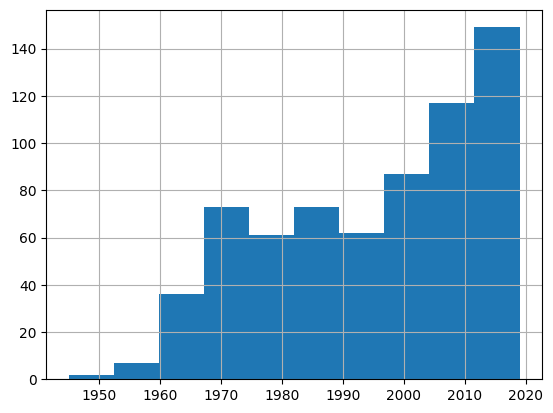

In [18]:
df['year'].hist()

<Axes: >

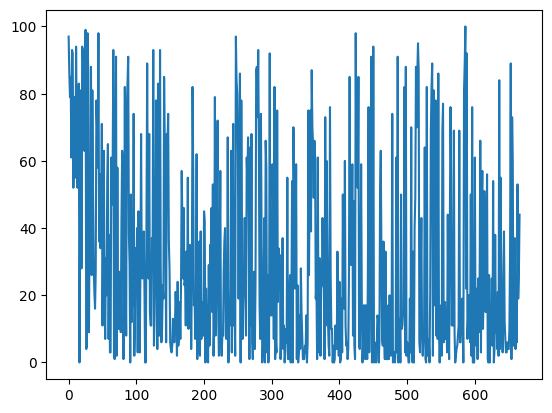

In [43]:
df['acous'].plot()

<Axes: >

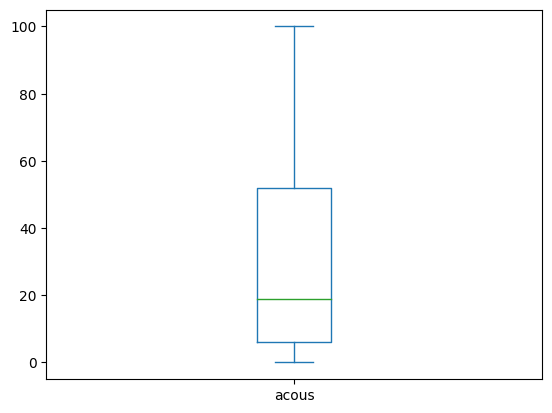

In [51]:
df['acous'].plot(kind='box')

## Mostrar géneros y artistas más repetidos

In [19]:
df['top genre'].mode()

0    dance pop
Name: top genre, dtype: object

In [20]:
serie = df['top genre'].value_counts()
pd.DataFrame(serie).head(10)

,count
top genre,
dance pop,114
adult standards,93
album rock,77
glam rock,23
brill building pop,20
europop,17
undefined,16
boy band,15
dance rock,15


In [21]:
serie = df['artist'].value_counts()
pd.DataFrame(serie).head(10)

,count
artist,
Elton John,12
Queen,11
ABBA,9
The Beatles,7
Barbra Streisand,6
Whitney Houston,6
Rihanna,6
Taylor Swift,5
Post Malone,5


## Mostrar la canción más popular y la menos popular

Columna pop

In [22]:
df.head()
df.tail()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44
4,Chicago - Remastered,Frank Sinatra,adult standards,1958,148,46,51,-10,40,79,134,61,7,47


In [23]:
# puntuación más alta en popularidad
df['popularity'].max()

94

In [24]:
# posición de la canción más popular
df['popularity'].idxmax()

652

In [25]:
df.loc[df['popularity'].idxmax()]

title               bad guy
artist        Billie Eilish
top genre        electropop
year                   2019
bpm                     135
nrgy                     43
dnce                     70
dB                      -11
live                     10
val                      56
dur                     194
acous                    33
spch                     38
popularity               94
Name: 652, dtype: object

In [26]:
pd.DataFrame(df.loc[df['popularity'].idxmin()])

,2
title,Held for Questioning
artist,Rusty Draper
top genre,deep adult standards
year,1953
bpm,109
nrgy,65
dnce,70
dB,-2
live,14
val,85


## Mostrar la canción más popular por año

In [27]:
df['year'].value_counts()

year
2017    42
2008    30
2016    24
2010    19
2009    18
        ..
1948     1
1960     1
1957     1
1953     1
1945     1
Name: count, Length: 66, dtype: int64

In [28]:
df.groupby('year')['popularity'].idxmax()

year
1945      0
1948      1
1953      2
1957      3
1958      4
       ... 
2015    557
2016    589
2017    619
2018    644
2019    652
Name: popularity, Length: 66, dtype: int64

In [29]:
index = df.groupby('year')['popularity'].idxmax()
df.loc[index]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44
4,Chicago - Remastered,Frank Sinatra,adult standards,1958,148,46,51,-10,40,79,134,61,7,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,The Hills,The Weeknd,canadian contemporary r&b,2015,113,56,58,-7,14,14,242,7,5,83
589,I Fall Apart,Post Malone,dfw rap,2016,144,54,56,-5,20,29,223,7,4,84
619,Thunder,Imagine Dragons,modern rock,2017,168,82,61,-5,15,29,187,1,4,85
644,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7,88


## Mostrar la canción más popular por década

In [30]:
# Crear columna década

In [31]:
df['year'] / 10

0      194.5
1      194.8
2      195.3
3      195.7
4      195.8
       ...  
662    201.9
663    201.9
664    201.9
665    201.9
666    201.9
Name: year, Length: 667, dtype: float64

In [32]:
df['year'] // 10

0      194
1      194
2      195
3      195
4      195
      ... 
662    201
663    201
664    201
665    201
666    201
Name: year, Length: 667, dtype: int64

In [33]:
df['year'] // 10 * 10

0      1940
1      1940
2      1950
3      1950
4      1950
       ... 
662    2010
663    2010
664    2010
665    2010
666    2010
Name: year, Length: 667, dtype: int64

In [34]:
df['decade'] = df['year'] // 10 * 10
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,decade
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52,1940
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,1940
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26,1950
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44,1950
4,Chicago - Remastered,Frank Sinatra,adult standards,1958,148,46,51,-10,40,79,134,61,7,47,1950


In [35]:
# extraer serie década
decade = df.pop('decade')

In [36]:
# ver columnas
df.columns

Index(['title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB',
       'live', 'val', 'dur', 'acous', 'spch', 'popularity'],
      dtype='object')

In [37]:
# extraer la posición de una columna
position = df.columns.get_loc('year') + 1 # posición 3 + 1
position

4

In [38]:
# insertar serie decada en la posición deseada
df.insert(position, 'decade', decade) # posición, nombre columna, serie a insertar

In [39]:
df.head()

,title,artist,top genre,year,decade,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,1940,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,1940,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1953,1950,109,65,70,-2,14,85,146,79,3,26
3,Only Because,The Platters,adult standards,1957,1950,73,28,55,-10,9,47,174,85,3,44
4,Chicago - Remastered,Frank Sinatra,adult standards,1958,1950,148,46,51,-10,40,79,134,61,7,47


In [40]:
index = df.groupby('decade')['popularity'].idxmax()
df.loc[index]

,title,artist,top genre,year,decade,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,1940,177,34,42,-11,72,78,123,86,4,62
8,A Teenager In Love,Dion & The Belmonts,adult standards,1959,1950,79,38,56,-9,13,62,158,67,3,60
61,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,1960,129,54,56,-10,18,39,186,3,3,82
128,Bohemian Rhapsody - 2011 Mix,Queen,glam rock,1975,1970,71,40,41,-10,30,22,354,27,5,84
182,Africa,TOTO,album rock,1982,1980,93,37,67,-18,5,73,296,26,3,83
340,No Scrubs,TLC,atl hip hop,1999,1990,93,68,74,-4,7,59,214,3,10,79
347,In the End,Linkin Park,alternative metal,2000,2000,105,86,56,-6,21,40,217,1,6,83
652,bad guy,Billie Eilish,electropop,2019,2010,135,43,70,-11,10,56,194,33,38,94


## Duración media de las canciones por año

Utilizar el campo dur

<Axes: xlabel='year'>

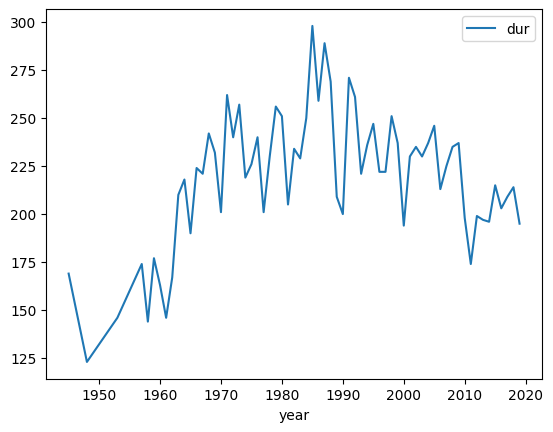

In [60]:
pd.DataFrame(df.groupby('year')['dur'].mean().round().astype(int)).plot()